In [105]:
from pandas import read_parquet
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
def normalise_per_all_cells(df, name, axis_size):
    df.loc[footprint["name"] == name, "bytes_per_cell"] = footprint.loc[footprint["name"] == name, "size_bytes"] / axis_size ** 2

def normalise_per_nnz(df, name, nnz):
    df.loc[footprint["name"] == name, "bytes_per_nnz"] = footprint.loc[footprint["name"] == name, "size_bytes"] / nnz

In [107]:
footprint = read_parquet("data/memory_footprints/memory_footprints.parquet")
footprint["size_kbytes"] = footprint["size_bytes"] / 1024
footprint["size_mbytes"] = footprint["size_kbytes"] / 1024
normalise_per_all_cells(footprint, "random_matrix_tiny", 1_000)
normalise_per_all_cells(footprint, "random_matrix_small", 10_000)
normalise_per_all_cells(footprint, "random_matrix_medium", 100_000)
normalise_per_all_cells(footprint, "random_matrix_large", 1_000_000)
normalise_per_all_cells(footprint, "transition_matrix_acyclic", 293_081)
normalise_per_all_cells(footprint, "transition_matrix_cyclic", 293_081)
normalise_per_nnz(footprint, "random_matrix_tiny", 100)
normalise_per_nnz(footprint, "random_matrix_small", 10_000)
normalise_per_nnz(footprint, "random_matrix_medium", 100_000)
normalise_per_nnz(footprint, "random_matrix_large", 1_000_000)
normalise_per_nnz(footprint, "transition_matrix_acyclic", 810_301)
normalise_per_nnz(footprint, "transition_matrix_cyclic", 810_301)
footprint.loc[footprint["name"] == "random_matrix_tiny", "name"] = "Random tiny"
footprint.loc[footprint["name"] == "random_matrix_small", "name"] = "Random small"
footprint.loc[footprint["name"] == "random_matrix_medium", "name"] = "Random medium"
footprint.loc[footprint["name"] == "random_matrix_large", "name"] = "Random large"
footprint.loc[footprint["name"] == "transition_matrix_acyclic", "name"] = "Dairy cow acyclic"
footprint.loc[footprint["name"] == "transition_matrix_cyclic", "name"] = "Dairy cow cyclic"
footprint

,name,sparse_format,size_bytes,size_kbytes,size_mbytes,bytes_per_cell,bytes_per_nnz
0,Random large,bsr,1.600144e+07,1.562641e+04,15.260162,0.000016,16.001440
1,Random large,coo,1.600125e+07,1.562622e+04,15.259979,0.000016,16.001248
2,Random large,csc,1.600138e+07,1.562634e+04,15.260101,0.000016,16.001376
3,Random large,csr,1.600138e+07,1.562634e+04,15.260101,0.000016,16.001376
4,Random large,dia,NaN,NaN,NaN,NaN,NaN
5,Random large,dok,1.939432e+08,1.893976e+05,184.958618,0.000194,193.943168
6,Random large,lil,1.600113e+07,1.562610e+04,15.259865,0.000016,16.001128
7,Random medium,bsr,1.601432e+06,1.563898e+03,1.527245,0.000160,16.014320
8,Random medium,coo,1.601240e+06,1.563711e+03,1.527061,0.000160,16.012400
9,Random medium,csc,1.601368e+06,1.563836e+03,1.527184,0.000160,16.013680


In [108]:
pivot_table = footprint.pivot(index="name", columns="sparse_format", values="bytes_per_nnz")
pivot_table = pivot_table.round(3)
pivot_table

sparse_format,bsr,coo,csc,csr,dia,dok,lil
name,,,,,,,
Dairy cow acyclic,13.872,16.566,13.871,13.871,1383.121,209.121,5.788
Dairy cow cyclic,13.872,16.566,13.871,13.871,18553.488,209.121,5.788
Random large,16.001,16.001,16.001,16.001,NaN,193.943,16.001
Random medium,16.014,16.012,16.014,16.014,NaN,204.430,16.011
Random small,16.142,16.123,16.136,16.136,58925.151,181.503,16.111
Random tiny,66.160,28.240,65.520,65.520,7499.520,199.280,171.040


C:\Users\Maxximiser\AppData\Local\hatch\env\virtual\chain-simulator\JEFSYxYp\benchmark\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='sparse_format', ylabel='bytes_per_nnz'>

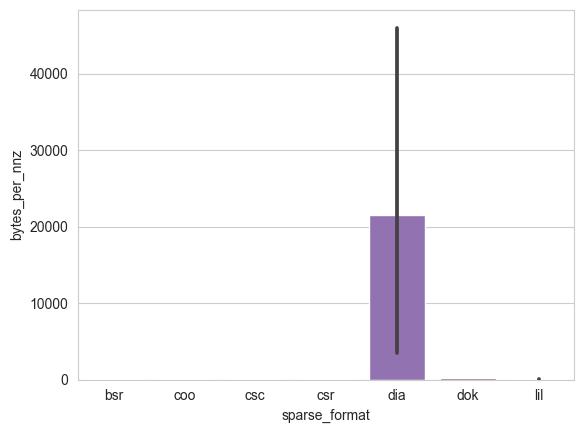

In [100]:
sns.barplot(footprint, x="sparse_format", y="bytes_per_nnz")

<Axes: xlabel='name', ylabel='bytes_per_nnz'>

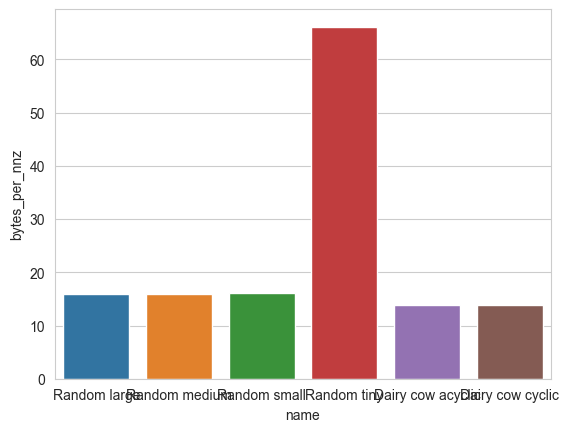

In [95]:
sns.barplot(footprint[footprint["sparse_format"] == "bsr"], x="name", y="bytes_per_nnz")

<Axes: xlabel='name', ylabel='bytes_per_nnz'>

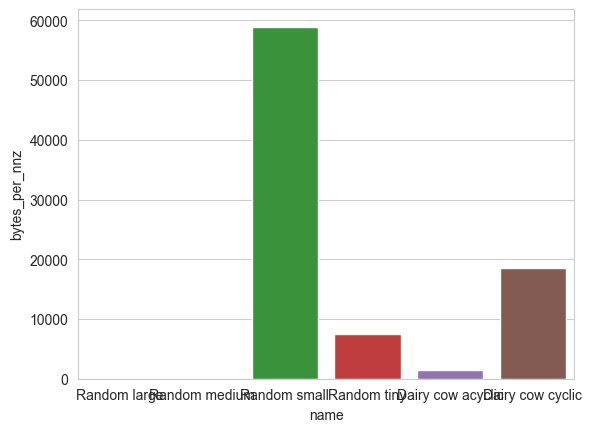

In [99]:
sns.barplot(footprint[footprint["sparse_format"] == "dia"], x="name", y="bytes_per_nnz")